# 1 Introducción

En el siguiente ejemplo se realiza la suma de dos matrices.[1]

La suma de matrices se realiza sumando los componentes de ambas matrices que se encuentran en la misma posición. Para poder realizar la suma ambas matrices deben tener la misma dimensión.

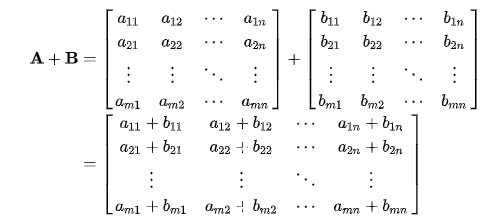

Para poder simular esto en C se realiza un vector de vectores donde el primer indice representa a la fila de la matriz y el segundo indice representa a las columnas.[2]

---
# 2 Armado del ambiente
Se codifica y compila el código escrito en C en el ambiente de desarrollo para la posterior ejecución.

In [6]:
# Codigo Python, que tiene el código C de la suma de matrices.
code = """
// La suma de matrices con OpenMP, usando c, ejecutado en Colab. 

#include <iostream>
#include <vector>
#include <cstdlib>
#include <sys/time.h>
#include <omp.h>    // Cabecera OpenMP   

// ----------------------------------------------------------------------------
// Macros que miden el tiempo.

static double dHashTiempoHistory[3];
static struct timeval tv;

#define TIEMPO_INI( h )      \
   gettimeofday(&tv,NULL);   \
   dHashTiempoHistory[ h ] = tv.tv_sec + tv.tv_usec/1000000.0;
   
   
#define TIEMPO_FIN( h )      \
   gettimeofday(&tv,NULL);   \
   dHashTiempoHistory[ h ] = ((tv.tv_sec + tv.tv_usec/1000000.0) - dHashTiempoHistory[ h ]) * 1000; // Devuelvo en milisegundos
#define TIEMPO_GET( h ) dHashTiempoHistory[ h ]

#define HTH_TOTAL         1
#define HTH_SUMA_SEC      2
#define HTH_SUMA_OMP      3

// ----------------------------------------------------------------------------

int main(int argc, char* argv[]) 
{ 
  int i,j,c;

  TIEMPO_INI( HTH_TOTAL )

  // Leo los parametros.
  if( argc != 3 )
  {
      std::cerr<< " Error en la cantidad de parámetros ingresados. Ingresar solamente el tamaño de los vectores a realizar el producto escalar."<<std::endl;
      exit( -1 );
  }

  int cantidad_filas = atoi( argv[1] );
  int cantidad_col = atoi( argv[2] );
  
  if(cantidad_filas <= 0 || cantidad_filas >20000)
  {
    std::cerr<< " Los parámetros ingresados deben estar comprendido entre 0 y 20000."<<std::endl;
      exit( -1 );
  }

  if(cantidad_col <= 0 || cantidad_col >20000)
  {
    std::cerr<< " Los parámetros ingresados deben estar comprendido entre 0 y 20000."<<std::endl;
      exit( -1 );
  }

  // --------------------------------------------
  // Defino la memoria de los vectores.

  std::vector<std::vector<double> > A( cantidad_filas, std::vector<double>(cantidad_col));
  std::vector<std::vector<double> > B( cantidad_filas, std::vector<double>(cantidad_col));
  std::vector<std::vector<double> > R( cantidad_filas, std::vector<double>(cantidad_col));

  for (int i=0;i<cantidad_filas;i++)
  {
    for(j=0;j<cantidad_col;j++)
    {
      A[i][j] = (rand()/(double)RAND_MAX)*0.73;
      B[i][j] = (rand()/(double)RAND_MAX)*0.73;
    }
  }
  // --------------------------------------------
  // Realizo la suma en forma secuencial.

  TIEMPO_INI( HTH_SUMA_SEC )

  
  for(i=0;i<cantidad_filas;i++)
  {
    for(j=0;j<cantidad_col;j++)
    {
      R[i][j] = A[i][j]+B[i][j];
    }
  }

  TIEMPO_FIN( HTH_SUMA_SEC )

  // --------------------------------------------
  // Realizo la suma con OpenMP.

  TIEMPO_INI( HTH_SUMA_OMP )
  

  
  for(i=0;i<cantidad_filas;i++)
  {
    #pragma omp parallel for
    for(j=0;j<cantidad_col;j++)
    {
      R[i][j] = A[i][j]+B[i][j];
    }
  }

  TIEMPO_FIN( HTH_SUMA_OMP )

  // --------------------------------------------
  // Muestro los resultados.
  /*
  std::cout<<std::endl;
  std::cout<<std::endl;

  std::cout<<"Matriz A:"<<std::endl;

  for(i=0;i<cantidad_filas;i++)
  {
    for(j=0;j<cantidad_col;j++)
    {
      std::cout<<A[i][j]<<"  ";
    }
    std::cout<<std::endl;
  }

  std::cout<<std::endl;
  std::cout<<std::endl;

  std::cout<<"Matriz B:"<<std::endl;
  for(i=0;i<cantidad_filas;i++)
  {
    for(j=0;j<cantidad_col;j++)
    {
      std::cout<<B[i][j]<<"  ";
    }
    std::cout<<std::endl;
  }

  std::cout<<std::endl;
  std::cout<<std::endl;

  std::cout<<"Matriz Resulado:"<<std::endl;
  for(i=0;i<cantidad_filas;i++)
  {
    for(j=0;j<cantidad_col;j++)
    {
      std::cout<<R[i][j]<<"  ";
    }
    std::cout<<std::endl;
  }

  std::cout<<std::endl;
  std::cout<<std::endl;
  */


  TIEMPO_FIN( HTH_TOTAL )

 std::cout<<"Valores Reales  :" <<std::endl;
 std::cout<<"Tiempo TOTAL     : "<<TIEMPO_GET(HTH_TOTAL   )<<" [ms]"<<std::endl;
 std::cout<<"Tiempo Sec  : "<<TIEMPO_GET(HTH_SUMA_SEC)<<" [ms]"<<std::endl;
 std::cout<<"Tiempo Omp  : "<<TIEMPO_GET(HTH_SUMA_OMP)<<" [ms]"<<std::endl;
 std::cout<<std::endl;
 std::cout<<"SpeedUp          : (tiempo Secuencial/tiempo paralelo) : "<<TIEMPO_GET(HTH_SUMA_SEC)<<" / "<<TIEMPO_GET(HTH_SUMA_OMP)<<" = "<<TIEMPO_GET(HTH_SUMA_SEC)/TIEMPO_GET(HTH_SUMA_OMP)<<std::endl;
 std::cout<<"Eficiencia       : SpeedUp/nro procesadores            : "<<TIEMPO_GET(HTH_SUMA_SEC)/TIEMPO_GET(HTH_SUMA_OMP)<<" / "<<omp_get_num_procs()<<" = "<<TIEMPO_GET(HTH_SUMA_SEC)/(omp_get_num_procs()*TIEMPO_GET(HTH_SUMA_OMP))<<std::endl;
 std::cout<<"Coste Sec        : nro procesadores*Tiempo             : "<<1<<" * "<<TIEMPO_GET(HTH_SUMA_SEC)<<" = "<<TIEMPO_GET(HTH_SUMA_SEC)<<std::endl;
 std::cout<<"Coste Omp        : nro procesadores*Tiempo             : "<<omp_get_num_procs()<<" * "<<TIEMPO_GET(HTH_SUMA_OMP)<<" = "<<omp_get_num_procs()*TIEMPO_GET(HTH_SUMA_OMP)<<std::endl;
 std::cout<<"Funcion Overhead : Coste Omp - tiempo Secuencial       : "<<omp_get_num_procs()*TIEMPO_GET(HTH_SUMA_OMP)<<" - "<<TIEMPO_GET(HTH_SUMA_SEC)<<" = "<<(omp_get_num_procs()*TIEMPO_GET(HTH_SUMA_OMP))-TIEMPO_GET(HTH_SUMA_SEC)<<std::endl;


 std::cout<<std::endl;
 std::cout<<"Valores Ideal: "<<std::endl;
 TIEMPO_GET(HTH_SUMA_OMP) = TIEMPO_GET(HTH_SUMA_SEC) / 2;
 std::cout<<"Tiempo Sec  : "<<TIEMPO_GET(HTH_SUMA_SEC)<<" [ms]"<<std::endl;
 std::cout<<"Tiempo Omp  : "<<TIEMPO_GET(HTH_SUMA_OMP)<<" [ms]"<<std::endl;

 std::cout<<"SpeedUp          : (tiempo Secuencial/tiempo paralelo) : "<<TIEMPO_GET(HTH_SUMA_SEC)<<" / "<<TIEMPO_GET(HTH_SUMA_OMP)<<" = "<<TIEMPO_GET(HTH_SUMA_SEC)/TIEMPO_GET(HTH_SUMA_OMP)<<std::endl;
 std::cout<<"Eficiencia       : SpeedUp/nro procesadores            : "<<TIEMPO_GET(HTH_SUMA_SEC)/TIEMPO_GET(HTH_SUMA_OMP)<<" / "<<omp_get_num_procs()<<" = "<<TIEMPO_GET(HTH_SUMA_SEC)/(omp_get_num_procs()*TIEMPO_GET(HTH_SUMA_OMP))<<std::endl;
 std::cout<<"Coste Sec        : nro procesadores*Tiempo             : "<<1<<" * "<<TIEMPO_GET(HTH_SUMA_SEC)<<" = "<<TIEMPO_GET(HTH_SUMA_SEC)<<std::endl;
 std::cout<<"Coste Omp        : nro procesadores*Tiempo             : "<<omp_get_num_procs()<<" * "<<TIEMPO_GET(HTH_SUMA_OMP)<<" = "<<omp_get_num_procs()*TIEMPO_GET(HTH_SUMA_OMP)<<std::endl;
 std::cout<<"Funcion Overhead : Coste Omp - tiempo Secuencial       : "<<omp_get_num_procs()*TIEMPO_GET(HTH_SUMA_OMP)<<" - "<<TIEMPO_GET(HTH_SUMA_SEC)<<" = "<<(omp_get_num_procs()*TIEMPO_GET(HTH_SUMA_OMP))-TIEMPO_GET(HTH_SUMA_SEC)<<std::endl;


}
// ----------------------------------------------------------------------------

"""
text_file = open("code_suma.cpp", "w")
text_file.write(code)
text_file.close()

## 2.2.Compilación de código C de la suma de matrices. 

In [7]:
!g++ -o suma_mtx -fopenmp code_suma.cpp

---
# 3 Desarrollo

## 3.1.Ejecución Suma de matrices.

In [8]:
#Ingresar la cantidad de filas y columnas de las matrices a sumar.
%env OMP_NUM_THREADS = 2
!./suma_mtx 20000 20000

env: OMP_NUM_THREADS=2
Valores Reales  :
Tiempo TOTAL     : 32796.4 [ms]
Tiempo Sec  : 6443.06 [ms]
Tiempo Omp  : 5885.01 [ms]

SpeedUp          : (tiempo Secuencial/tiempo paralelo) : 6443.06 / 5885.01 = 1.09483
Eficiencia       : SpeedUp/nro procesadores            : 1.09483 / 2 = 0.547413
Coste Sec        : nro procesadores*Tiempo             : 1 * 6443.06 = 6443.06
Coste Omp        : nro procesadores*Tiempo             : 2 * 5885.01 = 11770
Funcion Overhead : Coste Omp - tiempo Secuencial       : 11770 - 6443.06 = 5326.96

Valores Ideal: 
Tiempo Sec  : 6443.06 [ms]
Tiempo Omp  : 3221.53 [ms]
SpeedUp          : (tiempo Secuencial/tiempo paralelo) : 6443.06 / 3221.53 = 2
Eficiencia       : SpeedUp/nro procesadores            : 2 / 2 = 1
Coste Sec        : nro procesadores*Tiempo             : 1 * 6443.06 = 6443.06
Coste Omp        : nro procesadores*Tiempo             : 2 * 3221.53 = 6443.06
Funcion Overhead : Coste Omp - tiempo Secuencial       : 6443.06 - 6443.06 = 0


---
# 4 Tabla de pasos de ejecución del programa


 Procesador | Función | Detalle
------------|---------|----------
CPU      |  Variable Code       | Se guarda en una variable todo el código en que se va a ejecutar.
CPU      |  text_file Write     | Se crea un archivo .cpp con el código del programa
CPU      |  g++                 | Se compila el archivo guardado para crear un archivo binario.
CPU      |  Ejecucion           | Se ejecuta el programa compilado anteriormente.
CPU      |  #include         | Se incluyen las librerias necesarias.
CPU      |  #define          | Se definen funciones de temporizador.
CPU      |  TIEMPO_INI       | Inicia el temporizador del tiempo total.
CPU      |  atoi             | Se guarda en variables los parametros ingresados.  
CPU      |  if               | Se validan que los parámetros ingresados sean correctos.
CPU      |  std::vector           | Se definen las memorias de las matrices.
CPU      |  rand            | Se completan las matrices A y B con valores aleatorios.
CPU      |  TIEMPO_INI           | Inicia el temporizador de la suma de forma secuencial.
CPU      |  For anidados       | Se realiza la suma de matrices de forma secuencial.
CPU      |  TIEMPO_FIN      | Finaliza el temporizador de la suma de forma secuencial.
CPU      |  TIEMPO_INI       | Inicia el temporizador de la suma de forma paralela.
CPU      |  For anidados       | Se realiza la suma de matrices de forma paralela.
CPU      |  TIEMPO_FIN      | Finaliza el temporizador de la suma de forma paralela.
CPU      |  cout        | Se muestra por pantalla las matrices A, B y la matriz resultante de la suma.
CPU      |  TIEMPO_FIN          | Finaliza el temporizador del tiempo total.
CPU      |  cout          | Se muestra por pantalla las estadisticas de las ejecuciones secuencial y paralela.

---
# 5 Conclusiones

Como se puede apreciar en las estadisticas de la ejecución, la ejecución en paralelo tiene un mejor tiempo de respuesta que la ejecución en serie. Pero a diferencia de trabajar en GPGPU donde la diferencia es abismal, trabajar el paralelismo con openMP es menor la diferencia entre la ejecución en paralelo y en serie, ya que el paralelismo de openMP depende de la cantidad de núcleos que posea el procesador, si bien se pueden programar más hilos que la cantidad de núcleos, van a estar ejecutandose de forma concurrente solamente la cantidad de nucleos que haya disponible, el resto de los hilos estarán compitiendo por el procesador. 



---
# 6 Bibliografía


[1] Suma de matrices: [Wiki](https://es.wikipedia.org/wiki/Adici%C3%B3n_matricial)

[2] Manejo de matrices en C++: [Web](https://riptutorial.com/es/cplusplus/example/17463/matrices-usando-vectores) 